## Introduction to Data Science

### Advanced Topics on Matplotlib

In [1]:
import os
import sys
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

### 1. Building [Animations](https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c) with Matplotlib

linux: sudo apt install imagemagick

+ create a figure window with a single axis in the figure. 
+ create our empty line object which is essentially the one to be modified in the animation. The line object will be populated with data later.
+ create the init function that will make the animation happen. The init function initializes the data and also sets the axis limits.
+ define the animation function which takes in the frame number(i) as the parameter and creates a sine wave(or any other animation) which a shift depending upon the value of i. This function here returns a tuple of the plot objects which have been modified which tells the animation framework what parts of the plot should be animated.
+ create the actual animation object. The blit parameter ensures that only those pieces of the plot are re-drawn which have been changed.

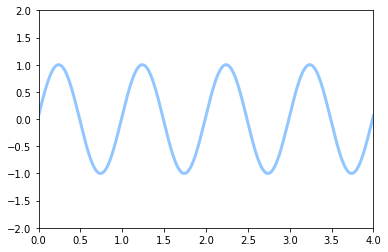

In [2]:
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

animation = FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)
animation.save('../../Data/Figs/sine_wave.gif', writer='imagemagick')

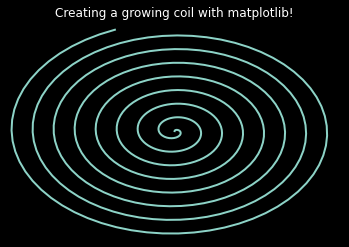

In [3]:
plt.style.use('dark_background')

fig = plt.figure() 
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50)) 
line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 
    # t is a parameter 
    t = 0.1*i 

    # x, y values to be plotted 
    x = t*np.sin(t) 
    y = t*np.cos(t) 
 
    # appending new points to x, y axes points list 
    xdata.append(x) 
    ydata.append(y) 
    line.set_data(xdata, ydata) 
    return line, 
    
# setting a title for the plot 
plt.title('Creating a growing coil with matplotlib!') 
# hiding the axis details 
plt.axis('off') 

# call the animator	 
animation = FuncAnimation(fig, animate, init_func=init, frames=500, interval=20, blit=True) 

# save the animation as mp4 video file 
animation.save('../../Data/Figs/coil.gif', writer='imagemagick') 

In [4]:
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [5]:
df = pd.read_csv('../../Data/CSV/city_populations.csv', usecols=['name', 'group', 'year', 'value'])
df.head(3)

name  group  year  value
0  Agra  India  1575  200.0
1  Agra  India  1576  212.0
2  Agra  India  1577  224.0

In [6]:
current_year = 2020
dff = (df[df['year'].eq(current_year)].sort_values(by='value', ascending=True).head(10))
dff

name          group  year    value
4329     New York  North America  2020  18793.0
2539      Karachi           Asia  2020  19230.0
4681        Osaka           Asia  2020  20523.0
1197        Cairo    Middle East  2020  20568.0
1338        Dhaka           Asia  2020  20989.0
3576  Mexico City  Latin America  2020  21868.0
5447    Sao Paulo  Latin America  2020  22119.0
3750       Mumbai          India  2020  22838.0
691       Beijing           Asia  2020  24201.0
5549     Shanghai           Asia  2020  27137.0

<BarContainer object of 10 artists>

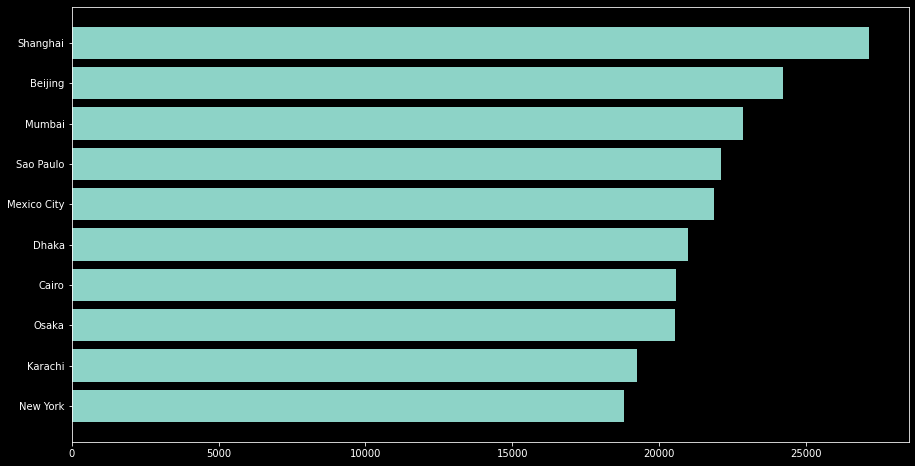

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['name'], dff['value'])

Text(1, 0.4, '2020')

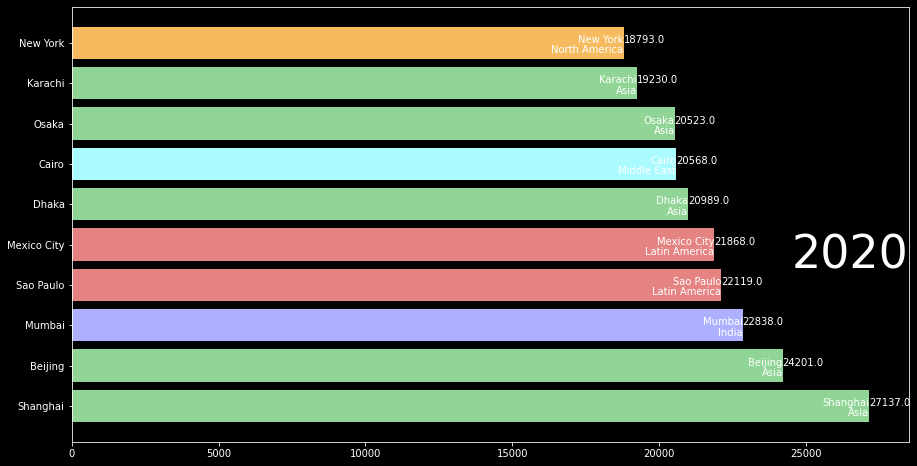

In [8]:
colors = dict(zip(['India', 'Europe', 'Asia', 'Latin America', 'Middle East', 'North America', 'Africa'],
                  ['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50']))

group_lk = df.set_index('name')['group'].to_dict()

fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-.25, group_lk[name],  ha='right')  # Asia: group name
    ax.text(value, i,     value,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

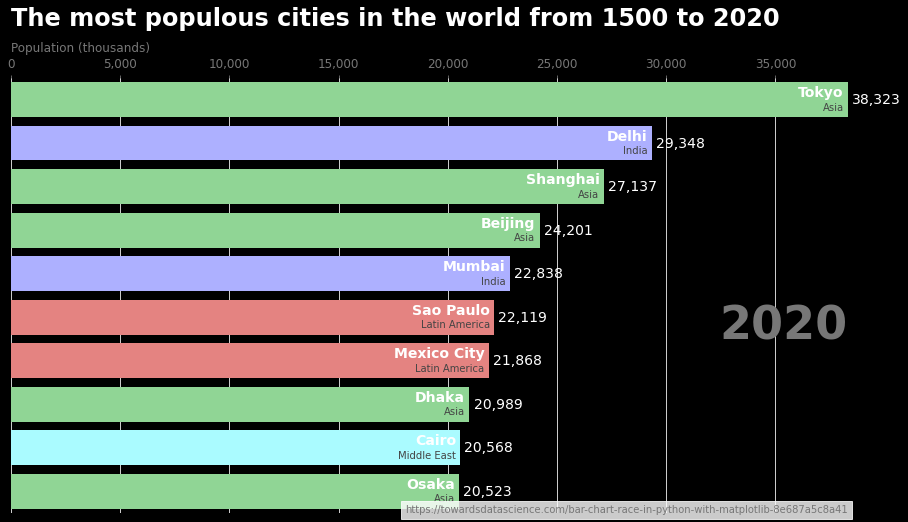

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most populous cities in the world from 1500 to 2020',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2020)

#with plt.xkcd():
#    fig, ax = plt.subplots(figsize=(15, 8))
#    draw_barchart(2018)

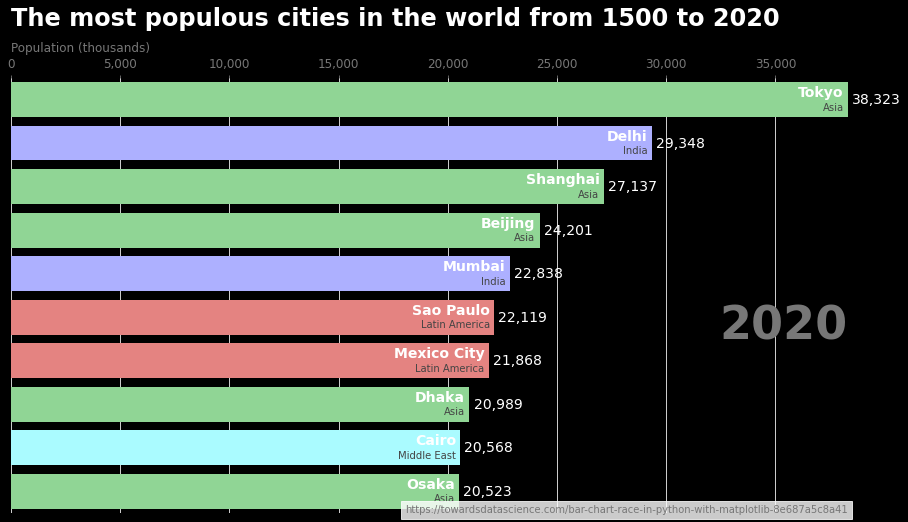

In [10]:
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1968, 2021))
HTML(animator.to_jshtml())

# or use animator.to_html5_video() or animator.save()

### 2. [Building infographics with Matplotlib](https://towardsdatascience.com/create-an-infographic-using-matplotlib-3fbb546c1628)  

[github link](https://github.com/Perishleaf/data-visualisation-scripts/tree/master/matplotlib_2019_temp)

In [11]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from datetime import datetime, timedelta
import calendar

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from matplotlib import cm
import matplotlib.dates as mdates

# enable matplotlib display static plot within jupyter notebook
%matplotlib inline

In [12]:
# Construct a function to extract temperature data for 2019 

def data_clean(df):
    df['Date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str)
    df['Date'] = [datetime.strptime(d, '%Y-%m-%d').date() for d in df['Date']]
    df.rename(columns={'Maximum temperature (Degree C)':'max_tmp_day'}, inplace=True)
    df = df.loc[df['Year'] == 2019]
    return df

In [14]:
# Read in all files and compile them together

import glob
from os.path import basename

all_files = glob.glob("../../Data/CSV/AU_temp/*_max_temp_2019.csv")

df = pd.DataFrame()
for filename in all_files:
    d_tmp = pd.read_csv(filename)
    # Here use string slice to extract city name from file name
    d_tmp["City"] = basename(filename)[:-18]
    d_tmp = data_clean(d_tmp)
    # replace NA value using its previous value
    d_tmp.loc[:, 'max_tmp_day'].fillna(method='ffill', inplace=True)
    #df = df.append(d_tmp, ignore_index=True)
    df = pd.concat([df, d_tmp], ignore_index=True)

df.head()

Product code  Bureau of Meteorology station number  Year  Month  Day  max_tmp_day  Days of accumulation of maximum temperature Quality    City        Date
0   IDCJAC0010                                 66062  2019      1    1         31.6                                          1.0       Y  sydney  2019-01-01
1   IDCJAC0010                                 66062  2019      1    2         29.8                                          1.0       Y  sydney  2019-01-02
2   IDCJAC0010                                 66062  2019      1    3         28.8                                          1.0       Y  sydney  2019-01-03
3   IDCJAC0010                                 66062  2019      1    4         32.2                                          1.0       Y  sydney  2019-01-04
4   IDCJAC0010                                 66062  2019      1    5         37.8                                          1.0       Y  sydney  2019-01-05

In [15]:
from statistics import mean

mean_temp = mean(df.max_tmp_day)
# only display 2 decimal float
print("Average temperature is {:.2f}".format(mean_temp))

Average temperature is 24.43


In [16]:
# set up plot style
from matplotlib import cycler
colors = cycler('color', ['#fc280f', '#5fdcff', '#f4ba26', '#85c54c', '#c6d7e0'])
plt.rc('figure', facecolor='#222222')
plt.rc('axes', 
       facecolor='#222222', 
       edgecolor='#222222',
       axisbelow=True, 
       grid=True, 
       prop_cycle=colors) # "axisbelow" set axis ticks and gridlines are below all artists

plt.rc('grid', color='#e3e3e3', linestyle='solid')
plt.rc('xtick', direction='in', color='#e3e3e3')
plt.rc('ytick', direction='in', color='#e3e3e3')
plt.rc('patch', edgecolor='#e3e3e3')
plt.rc('lines', linewidth=1.5)

/tmp/ipykernel_270586/2150188965.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  axInlet.set_xticklabels([4, 8, 16, 24, 32, 40], fontdict = {'fontsize': 5}, zorder=2)


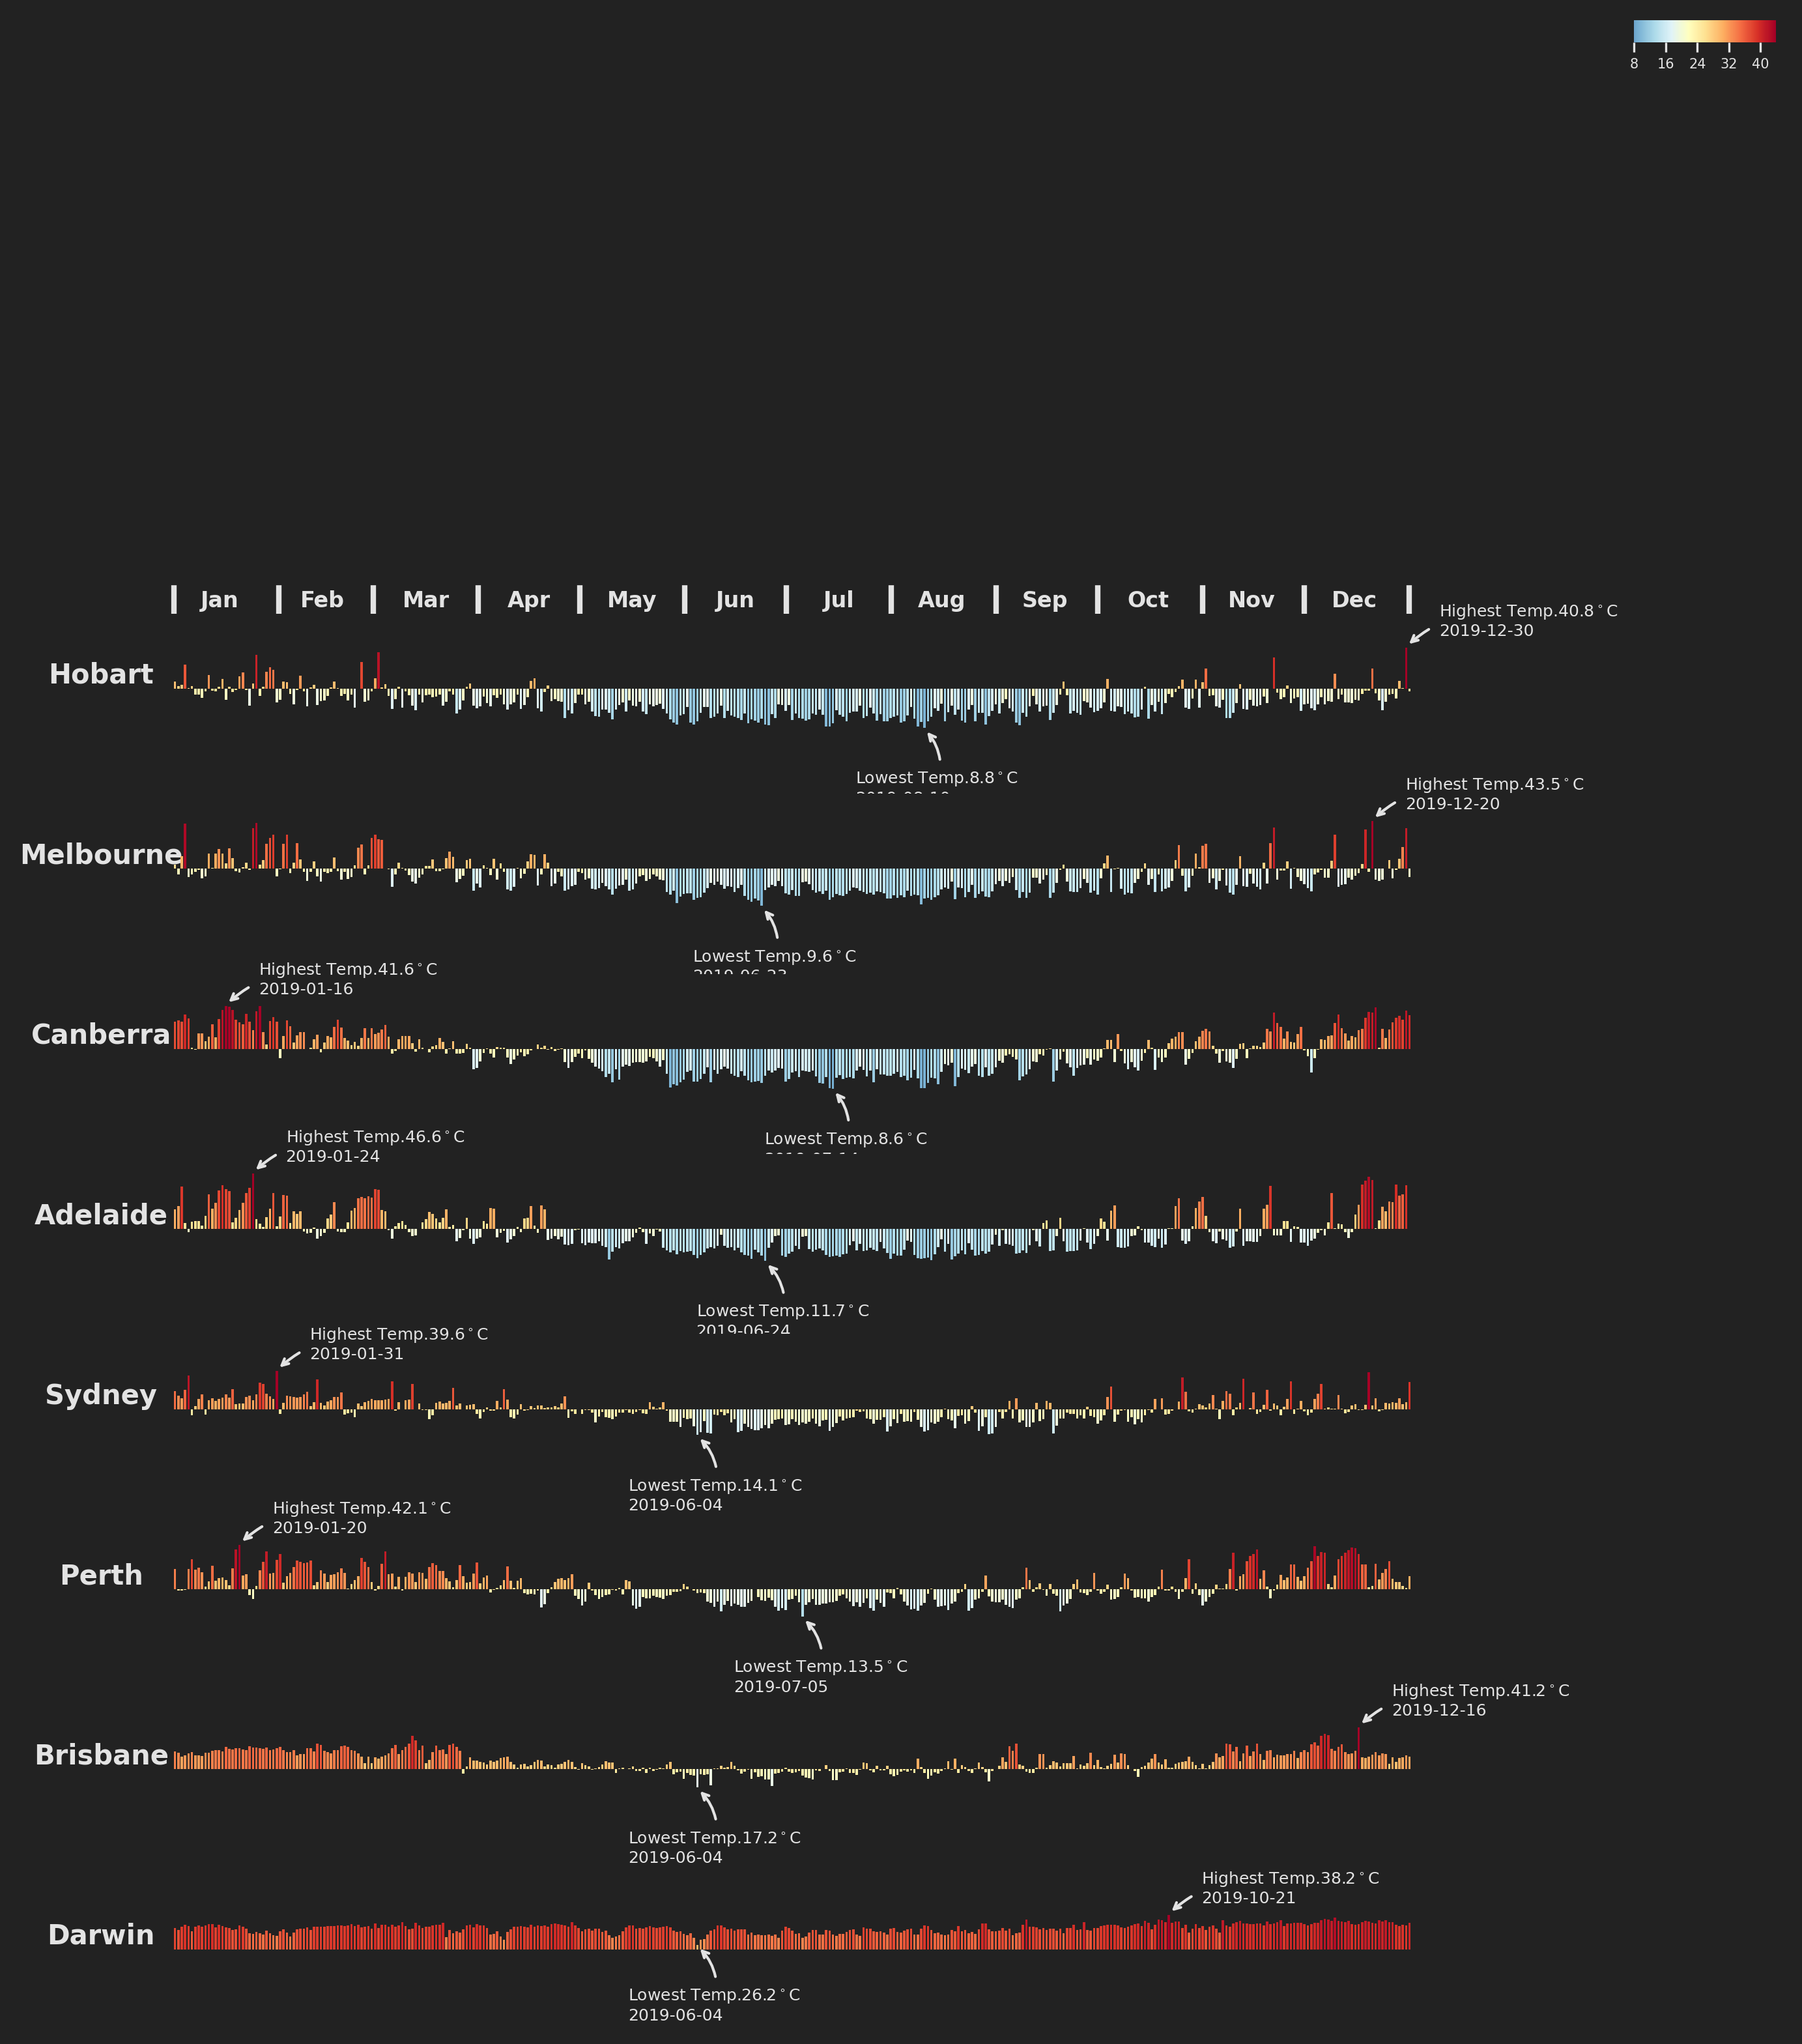

In [17]:
# Set canvas background color the same as axes
plt.rc('figure', facecolor='#222222')

# Arrange city based on latitude
cityList = ['hobart', 'melbourne', 'canberra', 'adelaide', 'sydney', 'perth', 'brisbane', 'darwin']

# set constrained_layout as True to avoid axes overlap
fig = plt.figure(figsize=(10,12), dpi=300,)# constrained_layout=True)

# Use GridSpec for customising layout
gs = fig.add_gridspec(nrows=10, ncols=10)

# Set up a empty axes that occupied 2 rows for text
axText = fig.add_subplot(gs[0:2, 0:9])
# Turn off all grid, ticks & spines
axText.grid(False)
axText.get_yaxis().set_visible(False)

# Use Sydney data for building a empty axes
axText.bar(df.loc[df['City'] == 'sydney'].Date, 
           df.loc[df['City'] == 'sydney'].max_tmp_day*0, 
           label='_1',
           width=1.5, 
           align="edge", 
           zorder=1)

# Adjustment for x-axis tick and tickLabel
axText.tick_params(axis="x", direction="out", which='major', width=2, length=15)
axText.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Show major tick every month
axText.xaxis.set_major_formatter(mdates.DateFormatter("")) # Don't Show tick label
for i, mon in enumerate(calendar.month_abbr[1:13]):
    axText.text(0.079*(i*0.96+1), 
                -0.05, mon,
                verticalalignment='center', 
                horizontalalignment='center',
                fontsize=8, color='#e3e3e3', 
                fontweight='bold',
                transform=axText.transAxes)

# Add text in the Axes coordinates
#axText.text(0.5, 0.8, "Temperature Patterns", 
#            verticalalignment='center', horizontalalignment='center',
#            fontsize=30, color='#e3e3e3', fontname='Baskerville', fontweight='bold',
#            transform=axText.transAxes)

# Add a color bar 
axInlet = fig.add_axes([0.9, 0.97, 0.08, 0.01], frameon=False)

# construct dummy value for color bar, length of x and y should be the same
xLegend = np.linspace(0, 179, 1800)
yLegend = np.linspace(min(df.max_tmp_day), max(df.max_tmp_day), 1800)

# Turn off all grid, ticks & spines
axInlet.grid(False)
axInlet.get_yaxis().set_visible(False)

colorsInlet = cm.RdYlBu_r(yLegend / max(yLegend))
axInlet.bar(xLegend, 
            yLegend**0, 
            label='_1', 
            color=colorsInlet, 
            align="center", 
            zorder=0)

axInlet.tick_params(axis="x", direction="out", pad=2)
axInlet.xaxis.set_major_locator(MultipleLocator(40))
axInlet.set_xticklabels([4, 8, 16, 24, 32, 40], fontdict = {'fontsize': 5}, zorder=2)


for i, city in enumerate(cityList):
    ax = fig.add_subplot(gs[i+2, 0:9], ylim=(-30, 30))
    
    df_tmp = df.loc[df['City'] == city]
    # color scheme
    colors = cm.RdYlBu_r(df_tmp.max_tmp_day / max(df_tmp.max_tmp_day))
    ax.bar(df_tmp.Date, 
           df_tmp.max_tmp_day - mean_temp, 
           label='_1', 
           color=colors,
           width=0.7, 
           align="edge")
    
    # annotation for highest temp.
    highDate = df_tmp.loc[df_tmp['max_tmp_day'] == max(df_tmp.max_tmp_day)].Date
    highTemp = max(df_tmp.max_tmp_day) - mean_temp
    ax.annotate("Highest Temp.{}$^\circ$C\n{}".format(max(df_tmp.max_tmp_day), 
                                                      str(highDate)[-36:-26]),
                xy=(highDate, highTemp), 
                xycoords='data',
                xytext=(highDate+timedelta(days=10), 
                        highTemp+5), 
                textcoords='data',
                size=6,
                color='#e3e3e3',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3, rad=.3",
                                color='#e3e3e3')
               )
    
    # annotation for lowest temp.
    lowDate = df_tmp.loc[df_tmp['max_tmp_day'] == min(df_tmp.max_tmp_day)].Date
    lowTemp = min(df_tmp.max_tmp_day) - mean_temp
    ax.annotate("Lowest Temp.{}$^\circ$C\n{}".format(min(df_tmp.max_tmp_day), 
                                                     str(lowDate)[-36:-26]),
                xy=(lowDate, lowTemp), 
                xycoords='data',
                xytext=(lowDate-timedelta(days=20), 
                        lowTemp-30), 
                textcoords='data',
                size=6,
                color='#e3e3e3',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3, rad=.3",
                                color='#e3e3e3')
               )
    
    # customise axes
    ax.spines['bottom'].set_color(None)  
    ax.spines['right'].set_color(None)  
    ax.spines['left'].set_color(None)  
    ax.spines['top'].set_color(None) 
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(city.title(), rotation=0, color='#e3e3e3', fontsize=10, fontweight='bold')
    
plt.show()